In [1]:
import matplotlib.pyplot as plt 

import numpy as np # linear algebra
import pandas as pd #data processing

from sklearn.model_selection import train_test_split

import os
import re
import nltk
# nltk.download()
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression# Logistic Regression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve



In [2]:
df = pd.read_csv('datasets/fake_real_final_dataset.csv')
df


,Unnamed: 0,title,label
0,0,"Dancing With The Stars 2018 Cast News, Tour an...",REAL
1,1,Amal Clooney displays her post-baby body in ti...,FAKE
2,2,Black Eyed Peas' Taboo claims Fergie turned do...,REAL
3,3,Pregnant Beyonce & Jay Z Jet Off To Bora Bora ...,REAL
4,4,Clint Eastwood Leaves His Estate To The Trump ...,FAKE
...,...,...,...
23191,23191,John Cena Plays His Entire Family (And Slimes ...,REAL
23192,23192,Chloe Moretz steps out in sharp outfit and 'f*...,REAL
23193,23193,‘NASA Confirms’ 15 Days Of Darkness Coming Thi...,FAKE
23194,23194,Paris Hilton's Happy It Girls Like Kendall Jen...,REAL


In [3]:
train, test = train_test_split(df, test_size=0.3)
train

,Unnamed: 0,title,label
9249,9249,Amal Clooney's mother Baria shops after baby news,REAL
9906,9906,Alyssa Milano Responds to Fat-Shaming Backlash...,REAL
21278,21278,Romneys ProLife Conversion Myth or Reality Jun...,REAL
11048,11048,Jennifer Aniston confronts Neri: ‘Stay away fr...,FAKE
21324,21324,Blake Shelton and Miranda Lambert: Why Their P...,REAL
...,...,...,...
20789,20789,Nick Jonas & Priyanka Chopra's Relationship Is...,FAKE
7,7,"S01.E01: Big Easy, Baby!",REAL
15309,15309,TeeWhy-Hive: Hailey Baldwin's Braid-to-Bun Is ...,REAL
16528,16528,Brad Pitt’s Divorce From Angelina Jolie Report...,FAKE


In [4]:
print(train.shape, test.shape)

(16237, 3) (6959, 3)


In [5]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

Unnamed: 0    0
title         0
label         0
dtype: int64
************
Unnamed: 0    0
title         0
label         0
dtype: int64


label
FAKE     5755
REAL    17441
Name: title, dtype: int64


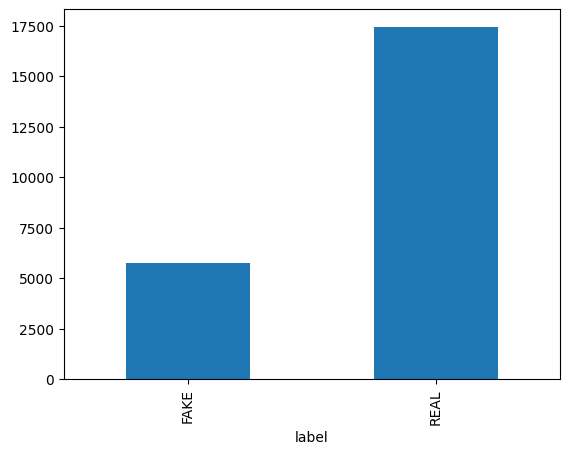

In [6]:
print(df.groupby(['label'])['title'].count())
df.groupby(['label'])['title'].count().plot(kind='bar')
plt.show()

In [7]:
stop_words = stopwords.words('english')
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['title']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization

    print(words)
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'title'] = filter_sentence


['Amal', 'Clooneys', 'mother', 'Baria', 'shops', 'after', 'baby', 'news']
['Alyssa', 'Milano', 'Responds', 'to', 'FatShaming', 'Backlash', 'Over', 'Netflixs', 'Insatiable']
['Romneys', 'ProLife', 'Conversion', 'Myth', 'or', 'Reality', 'June', '14']
['Jennifer', 'Aniston', 'confronts', 'Neri', 'Stay', 'away', 'from', 'Brad']
['Blake', 'Shelton', 'and', 'Miranda', 'Lambert', 'Why', 'Their', 'Past', 'Relationship', 'Drama', 'is', 'Resurfacing']
['Scott', 'Disick', 'Kisses', 'Yet', 'Another', 'Woman', 'in', 'Cannes', 'See', 'the', 'Pic']
['Tory', 'Burchs', 'StarStudded', 'Front', 'Row', 'Is', 'Squad', 'Goals']
['Harry', 'Styles', 'Dances', 'During', 'Jimmy', 'Fallons', 'SNL', 'Flash', 'Mob']
['Matt', 'LeBlanc', 'Is', 'Ready', 'to', 'Retire', 'at', 'Age', '50', 'Im', 'Done']
['Jennifer', 'Garners', 'Pretend', 'Cooking', 'Show', 'is', 'making', 'us', 'pretty', 'hungry']
['Encounters', 'With', 'Regular', 'Guy', 'Fred', 'Thompson', 'New', 'York', 'Magazine']
['George', 'Amal', 'Clooney', 'Pass

In [8]:
train = train[['title','label']]

In [9]:
print(train)
X_train = train['title']
Y_train = train['label']

                                                   title label
9249           amal clooneys mother baria shop baby news  REAL
9906    alyssa milano responds fatshaming backlash ov...  REAL
21278    romneys prolife conversion myth reality june 14  REAL
11048     jennifer aniston confronts neri stay away brad  FAKE
21324   blake shelton miranda lambert why their past ...  REAL
...                                                  ...   ...
20789   nick jonas priyanka chopras relationship is r...  FAKE
7                                   s01e01 big easy baby  REAL
15309   teewhyhive hailey baldwins braidtobun is it g...  REAL
16528   brad pitts divorce from angelina jolie report...  FAKE
7550                         15 denim skirts snag summer  REAL

[16237 rows x 2 columns]


In [10]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.transform(freq_term_matrix)


In [11]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in iter.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [12]:
test_counts = count_vectorizer.transform(test['title'].values)
test_tfidf = tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)
print(X_train.shape,X_test.shape)

(12177, 16798) (4060, 16798)


In [13]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Logistic classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

cm = confusion_matrix(y_test, pred)
cm


Accuracy of Logistic classifier on training set: 0.99
Accuracy of Logistic classifier on test set: 0.81


c:\fake_news_detection\my_venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 560,  463],
       [ 311, 2726]], dtype=int64)

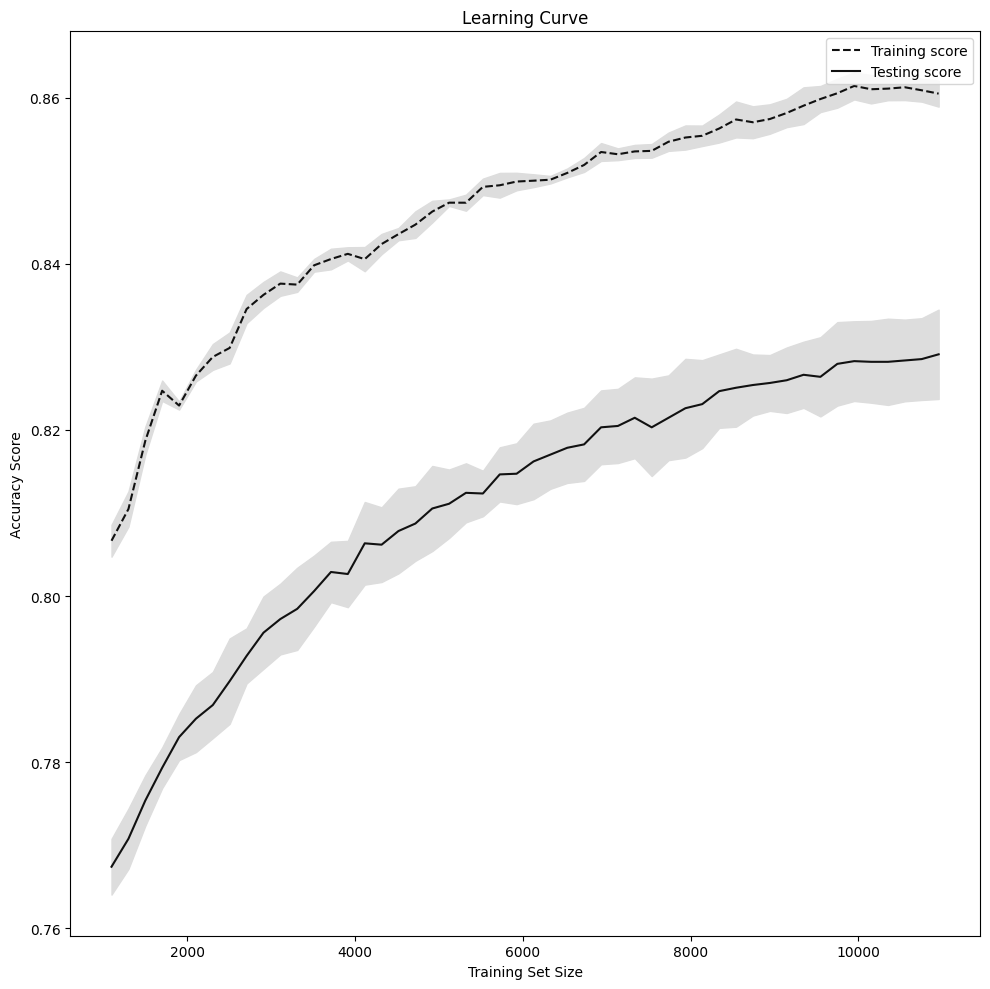

In [14]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [15]:
NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 0.84
Accuracy of NB classifier on test set: 0.80


array([[ 236,  787],
       [  31, 3006]], dtype=int64)

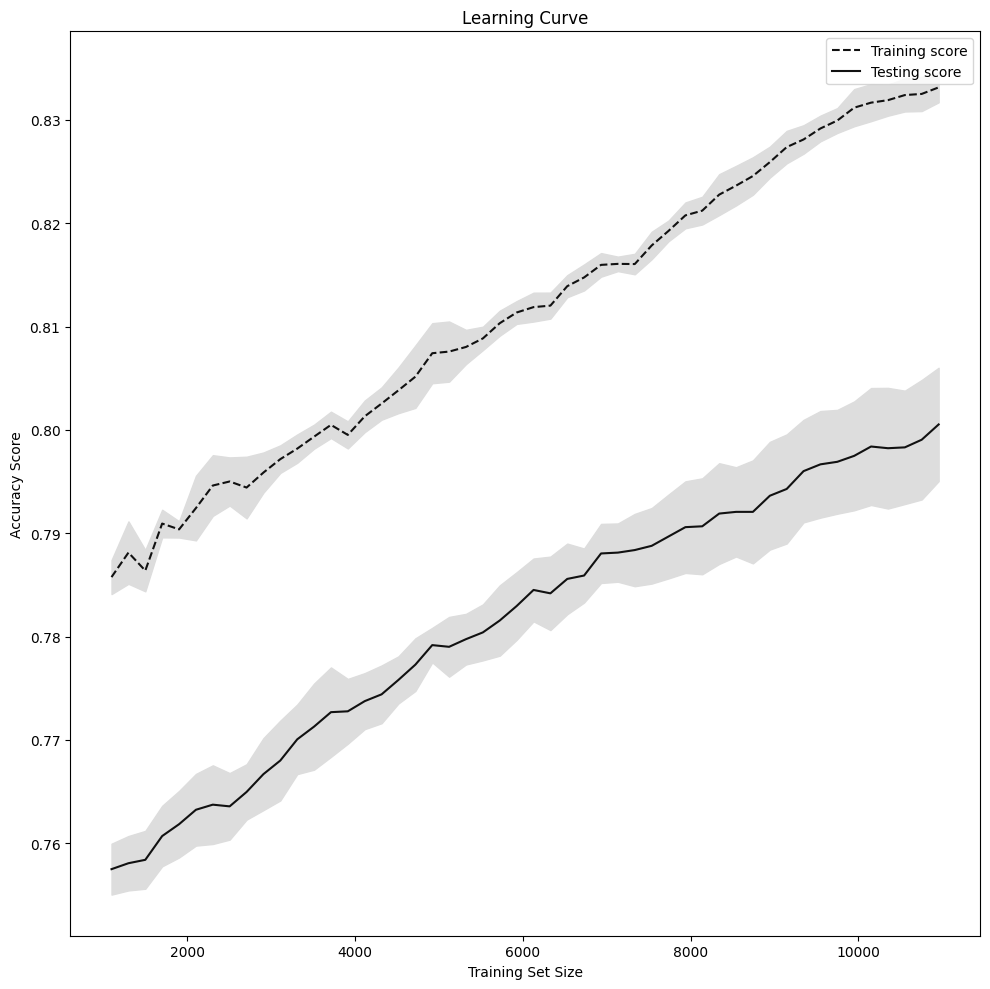

In [16]:
train_sizes, train_scores, test_scores = learning_curve(MultinomialNB(), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label="FAKE", average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

Precision: 0.779 / Recall: 0.417 / F1-Score: 0.544 / Accuracy: 0.823


In [18]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators=100), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
X_train = train['title']
Y_train = train['label']

In [ ]:
from sklearn.pipeline import Pipeline
import joblib

from sklearn import linear_model

In [ ]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])


In [ ]:
pipeline.fit(X_train, Y_train)

c:\fake_news_detection\my_venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0))])

In [ ]:
pipeline.predict(["Selena Gomez's Mom unhappy About Bieber Romance"])

array(['REAL'], dtype=object)

In [ ]:
pipeline.predict(["Brad Pitt unConfident Work"])

array(['REAL'], dtype=object)

In [ ]:
#saving the pipeline
filename = 'pipeline_final.sav'
joblib.dump(pipeline, filename)

['pipeline_final.sav']

In [ ]:
loaded_model = joblib.load(filename)


In [ ]:
result = loaded_model.predict(["‘Tormented’ Brad Pitt will only be allowed ‘to spend four hours with his children on Christmas Day’"])
print(result)

['REAL']


In [ ]:
result = loaded_model.predict(["Brad Pitt unConfident Work"])
print(result)

['REAL']
